In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(seed=42)
np.set_printoptions(precision=3, suppress=True)

# Let's define the activation and the Mean Squared Error functions

In [0]:
def sigmoid(x):
  return 1/(1 + np.exp(-x))

def sigmoidPrime(fx):
  return fx * (1 - fx)

def tanh(x):
  return np.tanh(x)

def tanhPrime(x):
  return 1 - np.tanh(x)**2

def relu(x):
  return np.maximum(x, 0)

def reluPrime(x):
  x[x<=0] = 0
  x[x>0] = 1
  return x


def mse_loss(y_true, y_pred):
  return ((y_true - y_pred) ** 2 ).mean(axis=None)

# The myNeuralNetwork class

In [0]:
class myNeuralNetwork(object):

  def __init__(self, dim, activation, activationPrime):
    
    self.dim = dim
    self.activation = activation
    self.activationPrime = activationPrime

    self.w = []
    self.b = []
    

    for i in range (1, len(self.dim)):
      self.w.append(np.random.randn(self.dim[i-1], self.dim[i]))
      self.b.append(np.random.randn(self.dim[i]))   
      

  def feedforward(self, X):

    l = len(self.dim)
    self.a = []
    self.z = []
    self.d = []

    for i in range(0,l):
      self.a.append(np.zeros(self.dim[i]))
    
    for i in range(1,l):
      self.z.append(np.zeros(self.dim[i]))
      self.d.append(np.zeros(self.dim[i]))

    self.a[0] = X
    for i in range (0, l-1):
      self.z[i] = np.dot(self.a[i], self.w[i]) + self.b[i]
      self.a[i+1] = self.activation(self.z[i])
    return self.a[-1]

  def backpropagation(self, X, y, out, mu):


    self.d[-1] = (y - out) * self.activationPrime(self.a[-1])

    for i in range(-2, -len(self.d)-1, -1):
      #print(np.dot(self.w[i+1],self.d[i+1]))
      #print(self.activationPrime(self.z[i]))
      #print("\n")
      self.d[i] = np.dot(self.w[i+1], self.d[i+1]) * self.activationPrime(self.a[i])
    

    for i in range(0, len(self.dim)-1):
      for j in range(0, self.dim[i+1]):
        for k in range(0, self.dim[i]):
          #if i == 0 & j == 0 & k==0:
            #print("i: " + str(i) + "\nj: " + str(j))
            #print ("Multiplying: " + str(mu) + " * " + str(self.a[i][k]) + " * " + str(self.d[i][j]))
            #print(mu * self.a[i][k] * self.d[i][j])
            #print("\n")
          self.w[i][k][j] += mu * self.a[i][k] * self.d[i][j]
        self.b[i][j] += mu * self.d[i][j]
    
        

  def train(self, data, y_true, epochs, learn_rate):
    for e in range(epochs):
      for x,y in zip(data, y_true):
        out = self.feedforward(x)
        self.backpropagation(x, y, out, learn_rate)

  def predict(self, x):
    return self.feedforward(x)


# Prepare the data

Weight mean: 73.23
Height mean: 168.57


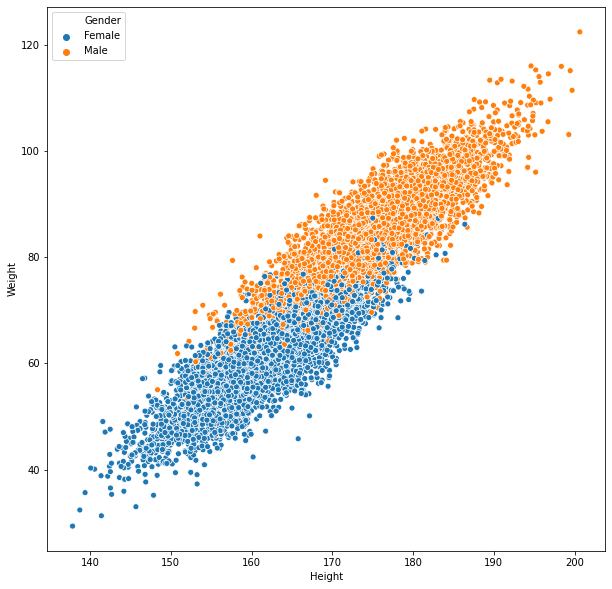

In [119]:
np.random.seed(42)

df2 = pd.read_csv("https://raw.githubusercontent.com/johnmyleswhite/ML_for_Hackers/master/02-Exploration/data/01_heights_weights_genders.csv")

df = df2.sample(frac=1) #.reset_index(drop=True)

df['Weight'] = df['Weight'] * 0.453592 #convert from pounds to kilos
df['Height'] = df['Height'] * 2.54 #convert from inches to centimeters

y_true = df['Gender'].map({"Male": 0,
                           "Female": 1})
data = df.loc[:,('Weight','Height')]

weight_mean = data["Weight"].mean()
print("Weight mean: %.2f" % weight_mean)
height_mean = data["Height"].mean()
print("Height mean: %.2f" % height_mean)


data["Weight"] -= weight_mean
#data[:,0] /= data[:,0].std()
data["Height"] -= height_mean
#data[:,1] /= data[:,1].std()

data.head()

x_train = data.iloc[0:199,:]
y_train = y_true.iloc[0:199]

x_test = data.iloc[100:300,:].reset_index(drop=True)
y_test = y_true.iloc[100:300].reset_index(drop=True)

plt.figure(figsize=[10,10])
sns.scatterplot(x=df["Height"], y=df["Weight"], hue=df["Gender"], )

In [120]:
df.head(10)
dfnew = df.reset_index(drop=True)
dfnew.head(15)

,Gender,Height,Weight
0,Female,174.465570,78.523948
1,Male,174.826508,88.523941
2,Male,168.651246,77.209274
3,Male,182.700524,97.544805
4,Male,170.288974,82.880989
5,Female,165.888508,61.885549
6,Male,167.755427,76.805048
7,Female,169.568039,68.438564
8,Female,159.000566,52.057339
9,Male,161.534997,65.585739


# Predict Gender from Weight and Height

In [124]:
network = myNeuralNetwork([2,10,5,1], sigmoid, sigmoidPrime)

#print("weights before:" + "\n-----------")
#[print(n) for n in network.w]
#print("\n")
#print("biases before:" + "\n-----------")
#[print(l) for l in network.b]
#print("\n")

network.train(np.array(x_train), np.array(y_train), 100, .001)

#print("dimensions:" + "\n-----------")
#[print(l) for l in network.dim]
#print("\n")

#print("weights after:" + "\n-----------")
#[print(n) for n in network.w]
#print("\n")
#print("biases after:" + "\n-----------")
#[print(l) for l in network.b]
#print("\n")
#print("zeds:" + "\n-----------")
#[print(l) for l in network.z]
#print("\n")
#print("self.activations:" + "\n-----------")
#[print(l) for l in network.a]
#print("\n")
#print("derivatives:" + "\n-----------")
#[print(l) for l in network.d]
#print("\n")



print("{} vs {}".format(network.predict(np.array(x_test)[22]), y_test[22]))
print("{} vs {}".format(network.predict(np.array(x_test)[24]), y_test[24]))
print("{} vs {}".format(network.predict(np.array(x_test)[25]), y_test[25]))
print("{} vs {}".format(network.predict(np.array(x_test)[26]), y_test[26]))

np.set_printoptions(precision=3)

y_predicted = network.predict(x_test)

loss = mse_loss(np.array(y_test), y_predicted)

print("%.2f" % loss + "%")

results = pd.DataFrame(columns=["Predicted", "True"])
results["Predicted"] = np.rint(np.squeeze(np.asarray(y_predicted))).astype(int)
results["True"] = y_test
difference = pd.DataFrame(results["True"]-results["Predicted"])
difference[0].value_counts()

[0.607] vs 1
[0.401] vs 0
[0.379] vs 0
[0.419] vs 0
0.26%


 0    177
 1     13
-1     10
Name: 0, dtype: int64

In [125]:
np.random.seed(42)

data = [[1,0,0,0,0,0,0,0],
        [0,1,0,0,0,0,0,0],
        [0,0,1,0,0,0,0,0],
        [0,0,0,1,0,0,0,0],
        [0,0,0,0,1,0,0,0],
        [0,0,0,0,0,1,0,0],
        [0,0,0,0,0,0,1,0],
        [0,0,0,0,0,0,0,1]]

y_true = [[1,0,0,0,0,0,0,0],
          [0,1,0,0,0,0,0,0],
          [0,0,1,0,0,0,0,0],
          [0,0,0,1,0,0,0,0],
          [0,0,0,0,1,0,0,0],
          [0,0,0,0,0,1,0,0],
          [0,0,0,0,0,0,1,0],
          [0,0,0,0,0,0,0,1]]

network = myNeuralNetwork([8,3,8], sigmoid, sigmoidPrime)

#print("weights before:" + "\n-----------")
#[print(n) for n in network.w]
#print("\n")
#print("biases before:" + "\n-----------")
#[print(l) for l in network.b]
#print("\n")

network.train(data, y_true, 1000, 1)
print("%s" % network.predict(data))
print ("MSE loss: %.f" % mse_loss(y_true, network.predict(data)))


y_predicted = [network.predict(entry) for entry in np.array(data)]

distance = np.sum([mse_loss(true, predicted) for true,predicted in zip(y_true, y_predicted)])

print("MSE Loss: %.2f" % distance + "%")

[[0.909 0.    0.08  0.052 0.044 0.024 0.    0.   ]
 [0.    0.936 0.085 0.    0.022 0.    0.028 0.035]
 [0.04  0.041 0.886 0.    0.001 0.042 0.    0.   ]
 [0.073 0.    0.001 0.906 0.003 0.047 0.004 0.066]
 [0.054 0.028 0.019 0.001 0.93  0.    0.    0.064]
 [0.011 0.    0.064 0.014 0.    0.92  0.048 0.   ]
 [0.    0.044 0.003 0.002 0.    0.056 0.928 0.064]
 [0.    0.013 0.    0.077 0.061 0.    0.053 0.874]]
MSE loss: 0
MSE Loss: 0.02%
